# Machine Learning Workflow


Lesson Goals

In this lesson you will learn:

    The procedure to apply Machine Learning.
    The inputs and outputs of every stage of the procedure.
    The role of experiments in Machine Learning.

Introduction

At this moment you may be wondering how to apply Machine Learning to a problem. This lesson provides the answers by breaking down the process into stages and explaining each stage, including the expected inputs and outputs. The Machine Learning workflow is composed of a series of subprocesses, or stages, so that the output of one subprocess is fed as input to the next subprocess. A helpful visual image is a pipeline connecting multiple processing machines.

Let's consider as a running example for this lesson an application to eHealth: a project for mining eHRs (electronic Health Records) to improve the quality and effectiveness of health care. More concretely, let's consider the problem of predicting the outcome of a medical treatment prescribed to a patient. Every patient is represented by an instance composed of a set of attributes describing the patient, for example: age, gender, height, weight, risk factors, medication, daily dosage, amount of intakes per day, dosage per intake, lowest blood pressure value, highest blood presure value, etc.

You can think of a patient as a vector of values, which are the independent variables. We use Machine Learning to learn a model to estimate the value of the dependent variable "efficacy of treatment" that we can model as a real variable in the range [0, 1] with 0 meaning that the treatment is totally ineffective, and 1 meaning totally effective. To evaluate the estimation produced by Machine Learning, we can compare the estimated value to the actual value, and consider the estimation as accurate enough if the difference is 3% at most.

In this lesson we will demonstrate the different stages of a machine learning workflow using the census dataset used in previous lessons.
ETL

ETL stands for Extraction, Transformation and Loading of data. And it is a preliminary process that has to be completed before proceeding to the application of Machine Learning.

In the Extraction phase, data is imported from data sources to a data storage with a single unified view, like a Data Warehouse. The data sources may be heterogeneous and distributed. For instance, in our eHealth example, the medical history of a patient may be distributed across different databases belonging to the same or different health systems.

In the Transformation phase, the extracted data is homogenized. This includes transforming the data in the following ways:

   **Conversion:** magnitudes expressed in different units are all converted to a single reference unit. For instance, all volume magnitudes are converted to milliliters (ml).

   **Remove outliers:** an outlier is a data point that clearly does not belong to the distribution of the rest of the dataset. In our eHealth example we can consider that an age of 150 years is certainly an outlier not belonging to the distribution of a representative sample of the general population. Whatever Machine Learning learns from the analysis of this instance is highly likely to not be applicable to the rest of the population. So the outlier is removed. There is another reason to remove the outlier from the data quality perspective. As we will see in the next bullet point, scaling the range of the age variable so that the highest age is mapped to 1, would make the rest of the mapped values to be inadequately compressed.

Recall our census dataset. Let's look at the dataset using the describe function.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
census=pd.read_csv('../census.csv')

In [3]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

Let's look for outliers in our census data. Even though the census data is thoroughly cleaned before it is released, for the sake of this exercise, let's pick the FamilyWork feature in our dataset. This column show the percent of people in each county that primarily perform unpaid family work. We can plot the boxplot of the feature to see how many points are extreme outliers.



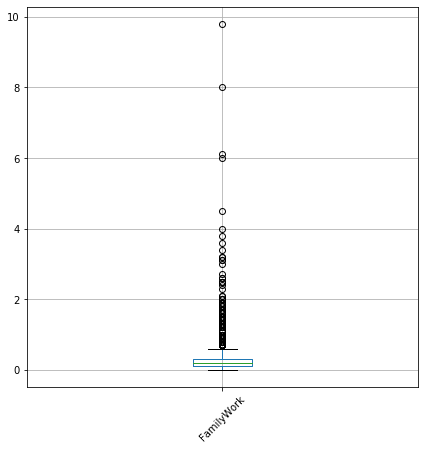

In [6]:
plt.figure(figsize=(7,7))
census.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.title('')
plt.show();

As we can see, quite a bit of data is considered extreme outliers in this boxplot. To get rid of these outliers, we typically remove the entire row that contains the outlier. We compute the outer fence which is 3 times the IQR from the first and third quartiles. We then remove the outliers using the following code.

In [7]:
import numpy as np
#census=census[pd.notnull(census.Income)]

q1 = np.percentile(census.FamilyWork, 25)
q3 = np.percentile(census.FamilyWork, 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr
#census_without_outliers = census[census.FamilyWork < upper_fence & census.FamilyWork > lower_fence]

print (len(census[census.FamilyWork < lower_fence]))
census_without_outliers=census[census.FamilyWork < upper_fence]
census_without_outliers.head()

0


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


Our initial dataset has 3220 rows and after removing outliers we have only 3022 rows. A total of 198 rows were removed.

   **Scaling:** all variables are scaled so that they take values from the same range, typically this range is [0, 1] (also known as Normalization). This is done to avoid bias effects in error metrics. For instance, consider variable A whose range is [0, 1] and variable B whose range is [0, 100]. A 10% error in the measurement of A would cause a "noise" of 0.01, but the same percentage of error in variable B would add a "noise" of 10. Thus the overall error might be dominated by errors in B due to scaling reasons, but not necessarily because of the right reason (possibly B has more influence in estimating the right value). Note that if we use an algorithm to scale the training data, then we will have to scale input data with the same algorithm before inputting it to the model learned by Machine Learning.

One thing we note in our dataset is that many columns in this dataset are expressed as a percent of the county population. These columns contain a number between 0 and 100. It might be easier for our calculations if we used a number between 0 and 1 and divided all these columns by 100.

We can do this one column at a time, for example, here we convert the Hispanic column: 

In [8]:
census['HispanicRate'] = census['Hispanic'] / 100

However, this is not very efficient. It is more efficient to convery all columns at once. First we make a list of the columns to be converted and then convert them.

In [9]:
def to_percent(x):
    return(x/100)

conversion_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork']

#we create a new list of columns. We prefer doing this since we'd rather keep the old data around just in case.

new_column_list = [x+'Rate' for x in conversion_list]
census[new_column_list] = census[conversion_list].apply(to_percent)

#Let's look at the Black rate to be sure this worked

census.BlackRate.head()                

0    0.185
1    0.095
2    0.467
3    0.214
4    0.015
Name: BlackRate, dtype: float64


   **Rounding:** all real values are rounded to the same amount of decimal figures. For instance 0.333333333333 becomes 0.3333.

Rounding can be done using the round function in Python.

We can round one of the rate columns that we generated. For example, we can round the NativeRate column to reduce the decimal places to 3. 

In [10]:
census['NativeRateRounded'] = round(census['NativeRate'], 3)
census.NativeRateRounded.head()

0    0.004
1    0.006
2    0.002
3    0.004
4    0.003
Name: NativeRateRounded, dtype: float64


   **Standardization:** transform the data so that it has zero mean (mean removal) and unit variance (variance rescaling). For instance, w = (x-mean) / sigma.

We can demonstrate this by standardizing the population size in each county. Scikit-learn (which is a library that we will introduce in greater detail in subsequent lessons) has a function that performs this task called MinMaxScaler. 

In [11]:
from sklearn.preprocessing import MinMaxScaler

#This code uses the reshape function to change the input into a two dimensional numpy array 
#since this is the input that the function takes.
census['TotalPopScaled'] = MinMaxScaler().fit_transform(census.TotalPop.values.reshape(-1,1))
census.TotalPopScaled.describe()

C:\Users\Javier\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


count    3220.000000
mean        0.009895
std         0.031809
min         0.000000
25%         0.001109
50%         0.002585
75%         0.006609
max         1.000000
Name: TotalPopScaled, dtype: float64


   **Dummy Variables/One Hot Encoding:** In order to use categorical variables in our models, we perform a transformation that is known in statistics as creating dummy variables and as one hot encoding in computer science. The main idea is to add a variable to the dataset for each value of the categorical variable but one. These variables then take a value of either zero or one to indicate whether the original feature was equal to the value in the new dummy variable column. For example, in the census dataset, we can create a dummy variable for the state feature. We will create a variable for every state and territory but one. The reason for this is that since only one of the dummy variables can be 1 for each row, this means that we can exactly predict the value of one column using the sum of all the rest. This will add a perfectly correlated column to our dataset. As we have shown in previous lessons, this scenario should be avoided.

Here is the code for creating a dummy variable for the State feature. 

In [12]:
states = pd.get_dummies(census.State, drop_first=True)
census_dummy = pd.concat([census, states], axis=1)
census_dummy.columns.values

array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ProfessionalRate',
       'ServiceRate', 'OfficeRate', 'ConstructionRate', 'ProductionRate',
       'DriveRate', 'CarpoolRate', 'TransitRate', 'WalkRate',
       'OtherTranspRate', 'WorkAtHomeRate', 'EmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'NativeRateRounded',
       'TotalPopScaled', 'Alaska', 'Arizona', 'Arkansas', 'California',
      


   **Shuffling:** when working with datasets contained in files (for instance ARFF files or CSV files), it makes sense to shuffle the rows. Otherwise other operations that will happen later in this workflow might be biased. In our eHealth example, if we have the dataset ordered by gender, train the model on the first half, and test it with the second, we would be applying the knowledge learned from the female population to the male population, which might bias the estimations.

In Pandas, we can shuffle rows using the sample function. We can take a random sample where we select 100% of our original data (sample proportion = 1). This will result in a random ordering of the data. 

In [13]:
shuffled_census = census.sample(frac=1)

After the dataset has been transformed, the Loading phase is executed to store the resulting dataset into a data store, for instance a database.


**Sampling**

After we have performed ETL on the raw data, we need to split the transformed dataset. At this point you have the option to apply Machine Learning in different ways (that will be explained in the following sections). The option that you choose to use is called your "Experimental Design". Depending on this experimental design you will need to split your transformed dataset in different ways. For the time being, it is enough to know about the simplest experimental design, known as train-test split. The train-test split means that the transformed dataset is divided into two disjoint subsets: one subset that will be used for training Machine Learning (known as the Training Set), and another to test the model learned by Machine Learning (known as the Test Set).

Note that the sampling used to select the train set and the test set must be random. If the transformed dataset is contained in a text file, it is very helpful to have this file shuffled during ETL (as mentioned in the preceding section).

Sampling is done using the sample function. Using this function, we can determine the number of rows we want in our sample or the proportion of the dataset.



In [14]:
#sample using proportion
census_prop_sample = census.sample(frac=0.5)
#sample using number of rows
census_size_sample = census.sample(n=1000)

**Holdout Set**

A Holdout Set is a subset that we obtain from the transformed dataset and that is not available to Machine Learning during the training phase (this phase is explained in the next section). In the case of the train-test split, the subset used to test the Machine Learning model is a holdout set known as the Test Set. And it is very important that this test set not be available to Machine Learning during training.


**Training**

After the Training Set is available as a result of the completion of the sampling phase, we are ready to put Machine Learning to work. Our first step is to select the Machine Learning algorithm. After selecting the Machine Learning algorithm, we train it on the Training Set.

If we want to perform a train test split, there is a specific function to perform this task called train_test_split in Scikit-learn. Using this function, we pick what proportion of the data will be in the training set and the remainder will be in the test set. Typically we like to have the majority of the dataset in our training set. This is because the more data we use for training, the more accurate our model will be.



In [15]:
from sklearn.model_selection import train_test_split

census_train, census_test = train_test_split(census, test_size = 0.2)
census_train.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,NativeRateRounded,TotalPopScaled
255,8021,Colorado,Conejos,8249,4111,4138,54.4,43.3,0.1,1.6,...,0.127,0.006,0.025,0.010,0.057,30.21,0.658,0.213,0.016,0.000813
2548,48051,Texas,Burleson,17293,8611,8682,19.7,66.2,12.3,0.2,...,0.134,0.001,0.008,0.006,0.026,73.52,0.694,0.217,0.002,0.001714
2775,48505,Texas,Zapata,14308,7153,7155,93.6,6.4,0.0,0.0,...,0.192,0.003,0.034,0.003,0.023,51.84,0.733,0.181,0.000,0.001417
601,17013,Illinois,Calhoun,4999,2528,2471,0.3,97.8,0.1,0.1,...,0.133,0.006,0.014,0.017,0.052,22.31,0.770,0.128,0.001,0.000490
3122,56007,Wyoming,Carbon,15739,8592,7147,17.4,78.4,1.4,0.6,...,0.107,0.004,0.042,0.015,0.054,78.51,0.725,0.218,0.006,0.001559


In [16]:
census_test.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,CarpoolRate,TransitRate,WalkRate,OtherTranspRate,WorkAtHomeRate,EmployedRate,PrivateWorkRate,PublicWorkRate,NativeRateRounded,TotalPopScaled
3219,72153,Puerto Rico,Yauco,39474,19047,20427,99.5,0.5,0.0,0.0,...,0.085,0.012,0.016,0.007,0.031,89.23,0.680,0.276,0.000,0.003924
2327,45023,South Carolina,Chester,32556,15902,16654,1.7,59.0,38.0,0.2,...,0.113,0.004,0.017,0.019,0.034,122.96,0.800,0.156,0.002,0.003235
2702,48359,Texas,Oldham,2071,1137,934,14.4,72.2,6.1,0.5,...,0.090,0.000,0.039,0.010,0.052,7.73,0.732,0.201,0.005,0.000198
1808,35025,New Mexico,Lea,68149,35007,33142,54.5,39.4,3.2,0.7,...,0.111,0.006,0.020,0.013,0.024,293.40,0.808,0.136,0.007,0.006780
2248,42009,Pennsylvania,Bedford,49086,24504,24582,1.1,97.1,0.5,0.2,...,0.104,0.002,0.025,0.016,0.041,224.99,0.810,0.108,0.002,0.004881


**What Happens During Training?**

During training, we apply the machine learning algorithm to our data. The algorithm typically comprised of two mathematical equations. The first equation is the mathematical model. The model describes the mathematical relationship between the features in the data. The second part of the algorithm is the loss function. The loss function quantifies how much information was lost using our model by comparing the actual data with the predicted data that is outputted by the model. Our goal is to optimize the loss. Some machine learning algorithms will continue iterating until achieving an optimal loss.

The output of the training phase is a trained model that incorporates the knowledge learned by Machine Learning, which can be queried to solve unseen problems (new problems different from those present in the training set).


**Testing**

Now, you might be wondering "how good is the model for solving new problems?" This is the question that the testing phase answers by computing the value of a quality metric. Usually you will have a threshold value for this quality metric, meaning that for the model to be usefull the value of its quality metric must be equal or greater to the threshold value.

It is important to note that the test set cannot be used for training. The fact that Machine Learning is trained with a training set of solved problems (supervised Machine Learning), and the fact that it solves those problems well, does not provide any useful information on how well it generalizes (how well it solves new problems).


**Experimental Design**

Machine Learning is an experimental science. This means that when you approach a new problem, you don't know beforehand what Machine Learning algorithm will solve the problem satisfactorily. So you have to try different algorithms and analyze what happens. Every time you perform one of these trials you are actually making a Machine Learning experiment. That is why it is said that Machine Learning is an experimental science.

Before you perform any Machine Learning experiment, you have to think about how you will proceed. This is what is called the experimental design. Next, you will learn about the most common expèrimental designs that you can try out in solving Machine Learning problems.

**Cross Validation**

There is a probability that the train-test split tests the model on the only subset where it performs well, thus providing an unreliable quality metric. To reduce this probability, you can test on many different test sets and compute an average of the individual quality metrics obtained. This is what cross validation does. The procedure is:

    Randomly partition the dataset in n bins.
    For every bin ( b):
        Train with the remaining ( n-1) bins.
        Test with b and obtain quality metric.
    Output the average of the n quality metrics obtained.



**Train-Validation-Test Split**

The training of some Machine Learning algorithms may be interpreted as learning a set of parameters that minimize the estimation error of the resulting model. How these parameters are learned is controlled by another set of parameters, that are called hyper parameters to avoid the confusion between both sets of parameters. Typical examples of this kind of Machine Learning paradigms are SVMs (Support Vector Machines) and Artificial Neural Networks.

The basic procedure is:

    Randomly partition the dataset in 3 disjoint subsets (training, validation, and test sets).
    Initialize the hyperparameters
    Train with the train set.
    Evaluate on validation set.
    Update best performing hyperparameters.
    Recompute/modify the hyperparameters while maximum number of iterations not reached.
    Using the best performing hyperparameters, compute the definitive quality metric on the test set.
